#  Linear Regression

## Josep Fortiana 2020-10-08

# 1. Simple linear regression: A simulated example

## Generate a simulated dataset for simple linear regression

In [1]:
#
# More or less arbitrary parameters for a line to be used as an auxiliary to data generation
#
trueA<-1   # Intercept   
trueB<-4   # Slope
#
# We will generate a random cloud of points around the given line. The standard deviation below is a measure of cloud dispersion
#
trueSd<-15  
#
# A small number of points 
#
sampleSize<-25 
#
n<-sampleSize 

In [2]:
#
# Uniformly spread x values in the interval [-n/2,n/2]
#
x<-(-(sampleSize-1)/2):((sampleSize-1)/2)
#
# y values of the form a + b*x + N(0,trueSd) (Gaussian errors around)
#
y<-trueA+trueB*x+rnorm(n=sampleSize,mean=0,sd=trueSd)
#rnorm = generadora d'aleatoris normals

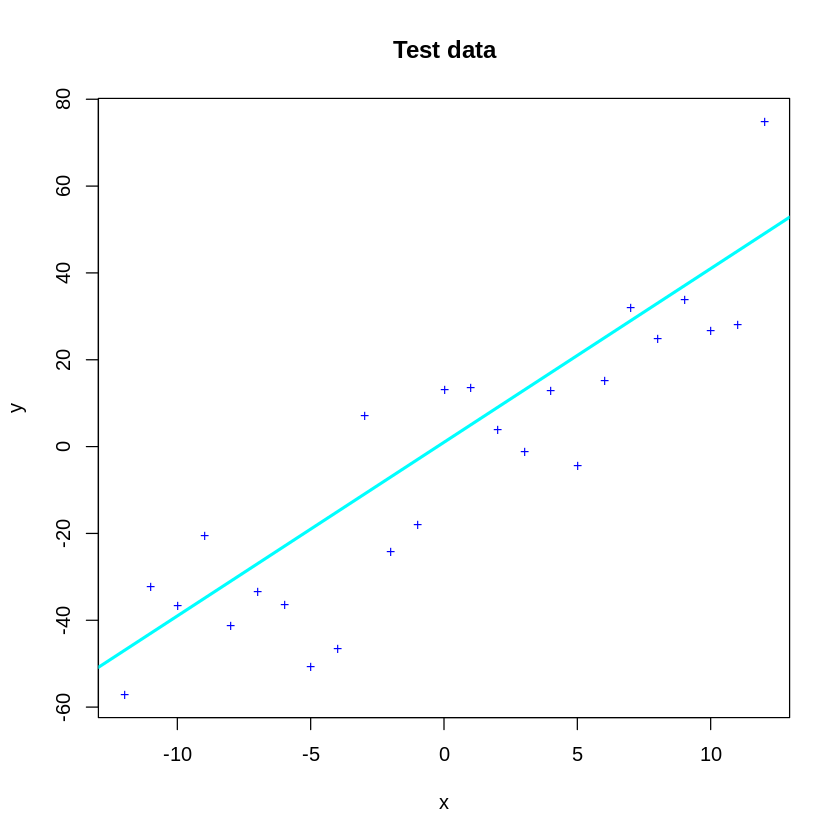

In [3]:
# Plot data points plus the line used in the generation
# Note this line is NOT a regression line, which will be computed below
#
options(repr.plot.width=7, repr.plot.height=7)
plot(x,y,pch='+',cex=0.8,col="blue",main="Test data")
abline(trueA,trueB,lwd=2.5,col="cyan")

## Adjust a least squares linear regression model

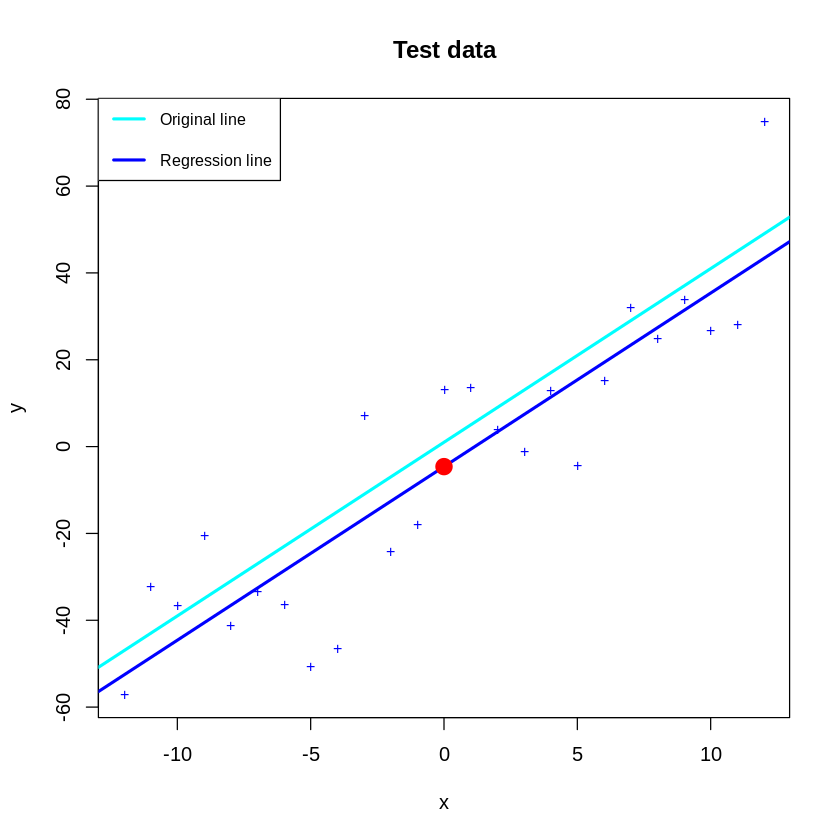

In [4]:
lm.1<-lm(y~x) #y signe de dependència x
options(repr.plot.width=7, repr.plot.height=7)
plot(x,y,pch='+',cex=0.8,col="blue",main="Test data")
abline(trueA,trueB,lwd=2.5,col="cyan")
abline(lm.1,lwd=2.5,col="blue")
legend("topleft",c("Original line","","Regression line"), lwd=2.5,col=c("cyan","white","blue"),cex=0.8)
points(mean(x),mean(y),pch=19,col="red",cex=1.8)

## Extract information from the fitted model

In [5]:
print(lm.1)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
     -4.612        3.998  



In [6]:
summary(lm.1)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.142  -8.539  -2.457   8.681  31.553 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -4.612      3.029  -1.523    0.141    
x              3.998      0.420   9.518 1.92e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.14 on 23 degrees of freedom
Multiple R-squared:  0.7975,	Adjusted R-squared:  0.7887 
F-statistic:  90.6 on 1 and 23 DF,  p-value: 1.924e-09


## Regression coefficients

In [7]:
str(lm.1)

List of 12
 $ coefficients : Named num [1:2] -4.61 4
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "x"
 $ residuals    : Named num [1:25] -4.55 16.43 8.08 20.17 -4.7 ...
  ..- attr(*, "names")= chr [1:25] "1" "2" "3" "4" ...
 $ effects      : Named num [1:25] 23.06 144.14 5.79 18.26 -6.23 ...
  ..- attr(*, "names")= chr [1:25] "(Intercept)" "x" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:25] -52.6 -48.6 -44.6 -40.6 -36.6 ...
  ..- attr(*, "names")= chr [1:25] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:25, 1:2] -5 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:25] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "x"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.2 1.25
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 23
 $ xlevels      : Named list()
 $ c

In [8]:
Coeff<-coefficients(lm.1)
round(Coeff,5)

(Intercept)           x 
   -4.61204     3.99778

In [9]:
a.hat<-Coeff[1]
b.hat<-Coeff[2]

In [10]:
a.hat<-as.numeric(lm.1$coefficients[1])
b.hat<-as.numeric(lm.1$coefficients[2])
round(a.hat,3)
round(b.hat,3)

[1] -4.612

[1] 3.998

# 2. Relevant quantities in a regression

## 1. Total Sum of Squares

In [11]:
# Total sum of squares
TotalSS<-sum(y^2)
round(TotalSS,3)

[1] 26583.18

In [12]:
# Centered data
y0<-y-mean(y)   

In [13]:
# Centered total sum of squares
TotalSS0<-sum(y0^2)        
round(TotalSS0,3)

[1] 26051.41

In [14]:
# Total number of degrees of freedom
n<-length(y)
Totaldf<-n

In [15]:
# Total number of degrees of freedom of the centered y
Totaldf0<-n-1

In [16]:
Totaldf
Totaldf0

[1] 25

[1] 24

## 2. Fitted values and Regression Sum of Squares

In [17]:
# Fitted values = valors ajustats a la recta = imatge dels punts (+)
yhat<-fitted.values(lm.1)
#yhat<-as.numeric(lm.1$fitted.values) # Alternative syntax
# Centered fitted values
yhat0<-yhat-mean(yhat)

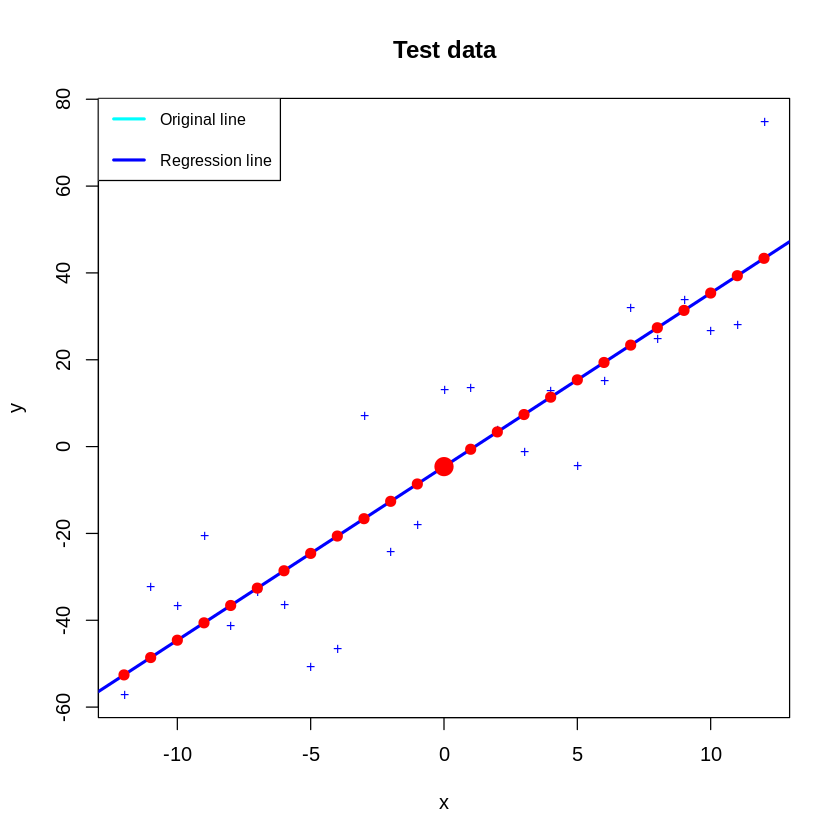

In [18]:
lm.1<-lm(y~x)
options(repr.plot.width=7, repr.plot.height=7)
plot(x,y,pch='+',cex=0.8,col="blue",main="Test data")
abline(lm.1,lwd=2.5,col="blue")
legend("topleft",c("Original line","","Regression line"), lwd=2.5,col=c("cyan","white","blue"),cex=0.8)
points(mean(x),mean(y),pch=19,col="red",cex=2.0)
points(x,yhat,pch=19,col="red",cex=1.1)

In [19]:
# Regression Sum of Squares
RegSS<-sum(yhat^2)
round(RegSS,3)
# Centered Regression Sum if Squares
RegSS0<-sum(yhat0^2)
round(RegSS0,3)
# Number of degrees of freedom of the regression
Regdf<-2
# Number of degrees of freedom of the regression (centered)
Regdf0<-1

Regdf
Regdf0

[1] 21308.64

[1] 20776.87

[1] 2

[1] 1

In [20]:
yhat.1<-a.hat+b.hat*x
round(max(abs(yhat.1-yhat)),8)

[1] 0

Check that `mean(y)` coincides with `mean(yhat)`

## 3. Regression residuals and Residual Sum of Squares

In [21]:
# The regression residuals can be extracted as:
ytilde<-residuals(lm.1)
# ytilde<-as.numeric(lm.11$residuals) # Alternative syntax
# Also: 
# ytilde<-y-yhat 
# or
# ytilde<-y0-yhat0
#
# Note that, since both y and yhat have the same mean, regression residuals are centered.
ResSS<-sum(ytilde^2)
Resdf<-Totaldf0-Regdf0
round(ResSS,3)
Resdf

[1] 5274.541

[1] 23

## 4. [Total Sum of Squares]  =  [Regression Sum of Squares]  +  [Residual Sum of Squares]

In [22]:
# Both with the non-centered and with the centered version
round(TotalSS-(RegSS+ResSS),10)
round(TotalSS0-(RegSS0+ResSS),10)

[1] 0

[1] 0

## 5. Regression Coefficient of Determination (Multiple R-squared)

In [23]:
# By definition, with the centered sums of squares
R2<-RegSS0/TotalSS0
round(R2,4)

[1] 0.7975

## 6. Adjusted Coefficient of Determination (Adjusted for the number $p$ of predictors)

$$
    {\bar {R}}^{2}=1-(1-R^{2})\dfrac{n-1}{n-p-1}
$$

The Adjusted Coefficient of Determination is also equal to:

$$
    {\displaystyle {\bar {R}}^{2}={1-{SS_{\text{res}}/{\text{df}}_{e} \over SS_{\text{tot}0}/{\text{df}}_{t0}}}}
$$

In [24]:
p<-1
R2adj.1<-1-(1-R2)*(n-1)/(n-p-1)
round(R2adj.1,4)
R2adj.2<-1-(ResSS/Resdf)/(TotalSS0/Totaldf0)
round(R2adj.1,4)

[1] 0.7887

[1] 0.7887

## 7. Mean squares and regression F statistic

In [25]:
TotalMeanS0<-TotalSS0/Totaldf0
RegMeanS0<-RegSS0/Regdf0
ResMeanS<-ResSS/Resdf    # Remember that residuals are centered (hence there is no need of a "0" here)
F<-RegMeanS0/ResMeanS
# The p-value is the probability of obtaining F values larger than the observed one, assuming the null 
# hypothesis that there is no regression relationship is true.
p.val<-1-pf(F,df1=Regdf0,df2=Resdf)
round(TotalMeanS0,3)
round(RegMeanS0,3)
round(ResMeanS,3)
round(F,3)
round(p.val,10)

[1] 1085.475

[1] 20776.87

[1] 229.328

[1] 90.599

[1] 1.9e-09

In [26]:
?pf

The quotient F is a measure of how the Regression Mean Squares exceeds the Residual Mean of Squares. 

When the model is a Gauss-Markov normal regression, this quantity follows a Fisher-Snedecor distribution with degrees of freedom Regdf0 and Resdf. The resulting $p$-value is computed assuming this is true. When it is larger than the standard significance level ($p$-value > 0.05) we conclude the regression model is non-significant.

## 8. The `anova()` function

Displays the Sums of Squares and Mean Squares, decomposed by each individual predictor and residuals contribution (here there is a single predictor `x`).

In [27]:
lm.1.anova<-anova(lm.1)
lm.1.anova
# str(lm.1.anova)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,20776.868,20776.8680,90.59897,1.924133e-09
Residuals,23,5274.541,229.3279,NA,NA


## 9. Residual standard error (estimate $\hat{\sigma}$ of the residuals standard deviation)

In [28]:
# Computing from the relevant quantities we have:
ResSE<-sqrt(ResMeanS)
round(ResSE,3)
# Alternatively, from the anova() function output:
sigma2.hat<-lm.1.anova$Sum[2]/lm.1.anova$Df[2]
sigma.hat<-sqrt(sigma2.hat)
round(sigma.hat,3)

[1] 15.144

[1] 15.144

## 10. Estimate of the matrix of variances and covariances of  $\hat{a}$ and $\hat{b}$

In [29]:
V<-vcov(lm.1)
round(V,3)
# Null out-of-diagonal entries result from the peculiar way x was constructed for this example. 
# In general one would expect non-null entries.

,(Intercept),x
(Intercept),9.173,0.000
x,0.000,0.176


## 11. Estimates of the standard deviations of the regression coefficients

In [30]:
v<-diag(V)
sigma2.a<-as.numeric(v[1])
sigma2.b<-as.numeric(v[2])
sigma.a<-sqrt(sigma2.a)
sigma.b<-sqrt(sigma2.b)
round(sigma.a,4)
round(sigma.b,4)

[1] 3.0287

[1] 0.42

## 12. Student's $t$ statistics

They are a standardized measure of how each of the regression coefficients, here $\hat{a}$ and $\hat{b}$, differ from zero.

When data are normal and the the regression model is Gauss-Màrkov these quantities follow a Student's distribution $t(n-p-1)$. 

For each coefficient, the $p$-value is, in principle, used to test the hypotheses:

$$
\left\{
\begin{array}{cl}
    H_{0}: \mskip15mu&\text{The coefficient is null,}\\
    H_{1}: \mskip15mu&\text{The coefficient is not zero,}
\end{array}\right.
$$

In practice, these $p$-valors are taken as a mere hint, a first step to a more precise assessment of the importance of each predictor.

In [31]:
t.a<-as.numeric(a.hat/sigma.a)
t.b<-as.numeric(b.hat/sigma.b)
round(t.a,4)
round(t.b,4)
p.val.a<-2*pt(-abs(t.a),n-2)
p.val.b<-2*pt(-abs(t.b),n-2)
round(p.val.a,8)
round(p.val.b,12)
S<-summary(lm.1)
coefficients(S)

[1] -1.5228

[1] 9.5183

[1] 0.1414478

[1] 1.924e-09

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-4.612039,3.0287150,-1.522771,1.414478e-01
x,3.997775,0.4200072,9.518349,1.924133e-09


## 13. The regression matrix (or model matrix)

Now we see how the least squares regression is actually computed:

In [32]:
X<-model.matrix(lm.1)
str(X)
X

 num [1:25, 1:2] 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:25] "1" "2" "3" "4" ...
  ..$ : chr [1:2] "(Intercept)" "x"
 - attr(*, "assign")= int [1:2] 0 1


,(Intercept),x
1,1,-12
2,1,-11
3,1,-10
4,1,-9
5,1,-8
6,1,-7
7,1,-6
8,1,-5
9,1,-4
10,1,-3


## 14 . Regression coefficients (estimates of)

The regression coefficients vector $\hat{\beta}=\left(\begin{array}{c}\hat{a}\\\hat{b}\end{array}\right)$ is computed as:

$$
    \hat{\beta}=(X'\cdot X)^{-1}\cdot X' \cdot y
$$

In [33]:
# Matrix to invert
Q<-t(X) %*% X
round(Q,3)

,(Intercept),x
(Intercept),25,0
x,0,1300


In [34]:
# Compute regression coefficients:
Q1<-solve(Q)   # inverse matrix
beta.hat<-Q1 %*%t(X) %*% y
round(beta.hat,4)

(Intercept),-4.6120
x,3.9978


## 15. The hat matrix and the fitted $\hat{y}$ values

The hat matrix for a regression with model matrix $X$ is:

$$
    H=X\cdot(X'\cdot X)^{-1}\cdot X'.
$$

It satisfies that:

$$
    H\cdot y  = X\cdot(X'\cdot X)^{-1}\cdot X'\cdot y= X\cdot(X'\cdot X)^{-1}\cdot X'\cdot y = X\cdot \hat{\beta} = \hat{y}.
$$

In [35]:
# The hat matrix is the [n,n] matrix:
H<-X %*% solve(Q)%*%t(X)
# H is the operator that "puts a hat" on y, giving yhat. 

In [36]:
# Check that indeed this yhat coincides with the one obtained above
yhat.1<-H %*% y
round(max(abs(yhat-yhat.1)),15)

[1] 3.6e-14

Properties of $H$

In [37]:
# The sum of diagonal entries in H (the trace of H) is equal to the rank of X
sum(diag(H))
# H is an idempotent matrix. The square of H is equal to H.
round(max(abs(H %*% H-H)),15)
#round(H,3)

[1] 2

[1] 0

## 16. Covariances of regression coefficients estimates

The matrix of variances and covariances of the coefficients vector:

$$
    \hat{\beta}=(X'\cdot X)^{-1}\cdot X' \cdot y
$$

is computed by:

$$
    \operatorname{Var}(\hat{\beta})=(X'\cdot X)^{-1}\cdot X'
       \cdot\operatorname{Var}(y)\cdot X\cdot(X'\cdot X)^{-1}
$$

If the Gauss-Markov condition holds, then $\operatorname{Var}(y)=\sigma^2\,I$ and the expression above is simplified:

$$
      \operatorname{Var}(\hat{\beta})=\sigma^2\,(X'\cdot X)^{-1}
$$

In [38]:
# Compare this V1 with the one obtained above with the vcov() function
V1<-Q1*sigma2.hat
V1

,(Intercept),x
(Intercept),9.173115,0.000000
x,0.000000,0.176406


# 3. The `Advertising` dataset

Download `Advertising.csv`, from the textbook web page [An Introduction to Statistical Learning with Applications in R (ISLR)](http://www-bcf.usc.edu/~gareth/ISL/data.html). This dataset is used both in lesson 3 in this course and in Chapter 3 of the textbook. In this section we follow the treatment of the `Advertising` dataset from his chapter.

Set the directory where you saved the dataset file as the RStudio working directory.

Read dataset.

Omit the first column, variable `X`, the index of each sample. Anyway it can be recovered by: `row.names(Advertising)`.

In [39]:
Advertising<-read.csv("Advertising.csv")
Advertising<-Advertising[,-1]

## Pairwise simple linear regressions

Following ISLR, Chapter 3:

Compute simple linear regressions, one for each of the predictors, `TV`, `Radio`, `Newspapers`. 

Plot all three scatterplots, superimposing on them the regression line.

What can be said about goodness-of-fit of these models?

Which variable, of the possible predictors, `TV`, `Radio`, `Newspapers`, is a better predictor of `Sales`?

Compare the goodness of fit of these linear regressions with the k-NN regressions from last lesson.

In [40]:
#
# Insert your code here
#

In [41]:
Advertising.lm.01<-lm(Sales~TV,data=Advertising)

In [42]:
summary(Advertising.lm.01)


Call:
lm(formula = Sales ~ TV, data = Advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


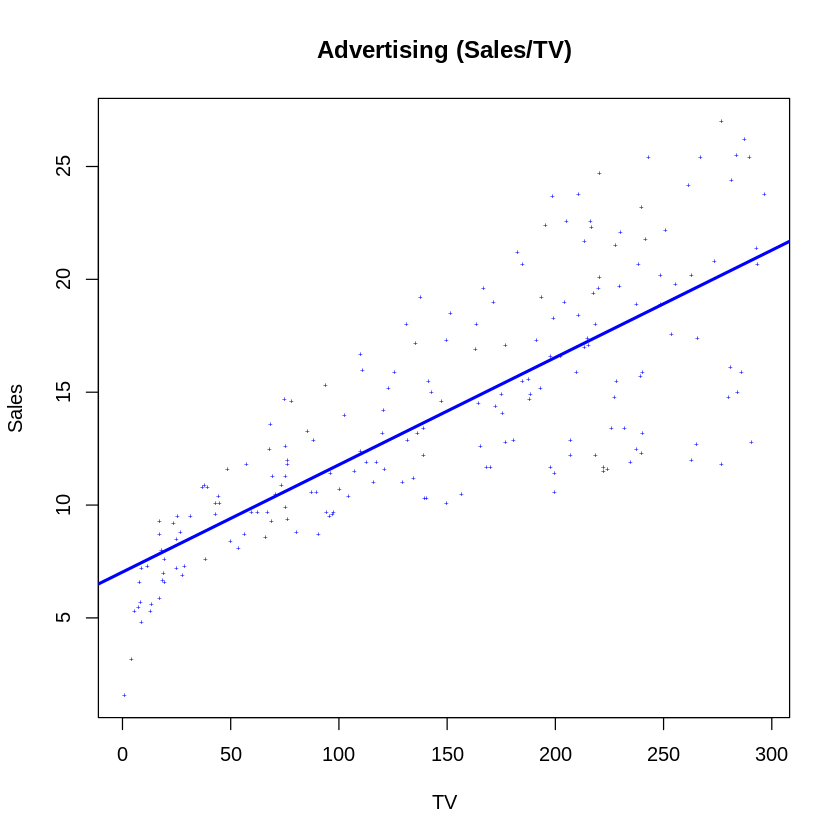

In [43]:
options(repr.plot.width=7, repr.plot.height=7)
plot(Sales~TV,pch='+',cex=0.4,col="blue",main="Advertising (Sales/TV)",data=Advertising)
abline(7.0325,0.047537,lwd=2.5,col="blue")

# 4. Multiple regression

In [44]:
Advertising<-read.csv("Advertising.csv")
Advertising<-Advertising[,-1]

In [45]:
str(Advertising)

'data.frame':	200 obs. of  4 variables:
 $ TV       : num  230.1 44.5 17.2 151.5 180.8 ...
 $ Radio    : num  37.8 39.3 45.9 41.3 10.8 48.9 32.8 19.6 2.1 2.6 ...
 $ Newspaper: num  69.2 45.1 69.3 58.5 58.4 75 23.5 11.6 1 21.2 ...
 $ Sales    : num  22.1 10.4 9.3 18.5 12.9 7.2 11.8 13.2 4.8 10.6 ...


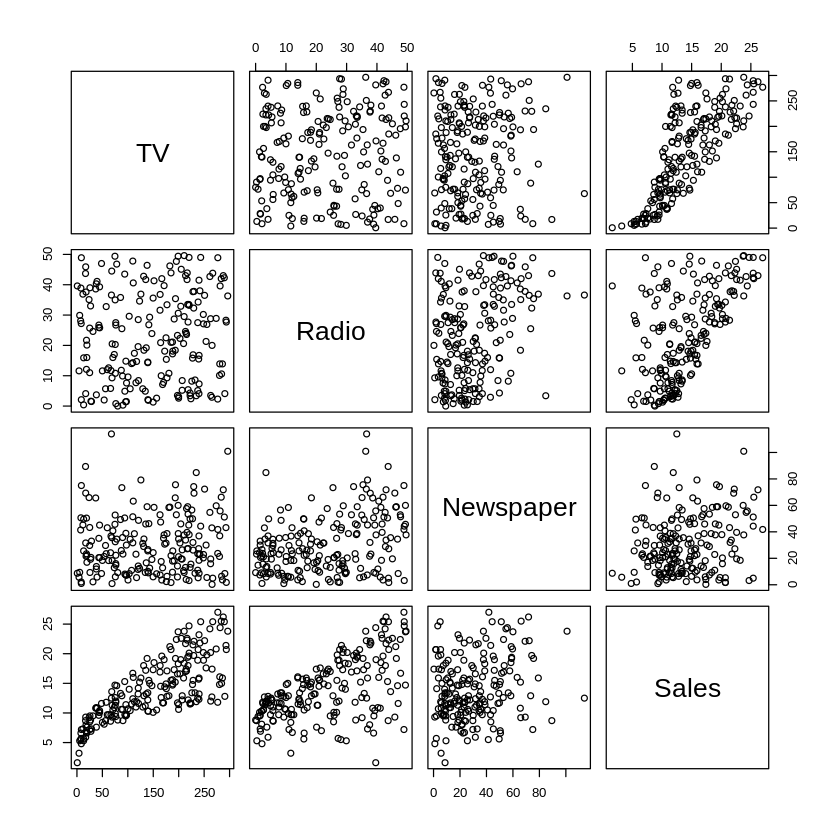

In [46]:
plot(Advertising)

In [47]:
cor(Advertising)
round(cor(Advertising),2)
round(cor(Advertising),1)

,TV,Radio,Newspaper,Sales
TV,1.00000000,0.05480866,0.05664787,0.7822244
Radio,0.05480866,1.00000000,0.35410375,0.5762226
Newspaper,0.05664787,0.35410375,1.00000000,0.2282990
Sales,0.78222442,0.57622257,0.22829903,1.0000000


,TV,Radio,Newspaper,Sales
TV,1.00,0.05,0.06,0.78
Radio,0.05,1.00,0.35,0.58
Newspaper,0.06,0.35,1.00,0.23
Sales,0.78,0.58,0.23,1.00


,TV,Radio,Newspaper,Sales
TV,1.0,0.1,0.1,0.8
Radio,0.1,1.0,0.4,0.6
Newspaper,0.1,0.4,1.0,0.2
Sales,0.8,0.6,0.2,1.0


Multiple linear regression of Sales on all three predictors

In [48]:
lm.Advertising.01<-lm(Sales~TV+Radio+Newspaper,data=Advertising)
summary(lm.Advertising.01)
anova(lm.Advertising.01)


Call:
lm(formula = Sales ~ TV + Radio + Newspaper, data = Advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8277 -0.8908  0.2418  1.1893  2.8292 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.938889   0.311908   9.422   <2e-16 ***
TV           0.045765   0.001395  32.809   <2e-16 ***
Radio        0.188530   0.008611  21.893   <2e-16 ***
Newspaper   -0.001037   0.005871  -0.177     0.86    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.686 on 196 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 570.3 on 3 and 196 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TV,1,3.314618e+03,3.314618e+03,1.166731e+03,1.809337e-84
Radio,1,1.545617e+03,1.545617e+03,5.440501e+02,1.882722e-58
Newspaper,1,8.871717e-02,8.871717e-02,3.122805e-02,8.599151e-01
Residuals,196,5.568253e+02,2.840945e+00,NA,NA


In [49]:
# Equivalent, alternative, notation
lm.Advertising.02<-lm(Sales~.,data=Advertising)
summary(lm.Advertising.02)
anova(lm.Advertising.02)


Call:
lm(formula = Sales ~ ., data = Advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8277 -0.8908  0.2418  1.1893  2.8292 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.938889   0.311908   9.422   <2e-16 ***
TV           0.045765   0.001395  32.809   <2e-16 ***
Radio        0.188530   0.008611  21.893   <2e-16 ***
Newspaper   -0.001037   0.005871  -0.177     0.86    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.686 on 196 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 570.3 on 3 and 196 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TV,1,3.314618e+03,3.314618e+03,1.166731e+03,1.809337e-84
Radio,1,1.545617e+03,1.545617e+03,5.440501e+02,1.882722e-58
Newspaper,1,8.871717e-02,8.871717e-02,3.122805e-02,8.599151e-01
Residuals,196,5.568253e+02,2.840945e+00,NA,NA


# 5. The _Credit_ dataset

In [53]:
install.packages("ISLR",dependencies=TRUE,repos= "https://cloud.r-project.org")
require(ISLR)

Installing package into ‘/home/pau/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Loading required package: ISLR



In [54]:
data(Credit)
str(Credit)

'data.frame':	400 obs. of  12 variables:
 $ ID       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Income   : num  14.9 106 104.6 148.9 55.9 ...
 $ Limit    : int  3606 6645 7075 9504 4897 8047 3388 7114 3300 6819 ...
 $ Rating   : int  283 483 514 681 357 569 259 512 266 491 ...
 $ Cards    : int  2 3 4 3 2 4 2 2 5 3 ...
 $ Age      : int  34 82 71 36 68 77 37 87 66 41 ...
 $ Education: int  11 15 11 11 16 10 12 9 13 19 ...
 $ Gender   : Factor w/ 2 levels " Male","Female": 1 2 1 2 1 1 2 1 2 2 ...
 $ Student  : Factor w/ 2 levels "No","Yes": 1 2 1 1 1 1 1 1 1 2 ...
 $ Married  : Factor w/ 2 levels "No","Yes": 2 2 1 1 2 1 1 1 1 2 ...
 $ Ethnicity: Factor w/ 3 levels "African American",..: 3 2 2 2 3 3 1 2 3 1 ...
 $ Balance  : int  333 903 580 964 331 1151 203 872 279 1350 ...


In [ ]:
# See the Credit dataset help file 
# From the information we see there, we should:
# 1. Remove the ID from the dataset
# 2. Check the qualitative predictors are indeed coded as factors
Credit<-Credit[,-1]
str(Credit)

In [ ]:
# Isolate the quantitative variables from Credit (as in Figure 3.6)
with(Credit,Credit.Quant<<-data.frame(Balance,Age,Cards,Education, Income,Limit,Rating))
str(Credit.Quant)

In [ ]:
plot(Credit.Quant,pch=19,col="DarkBlue",cex=0.3)

In [ ]:
round(cor(Credit.Quant),2)

# 6. Regression with qualitative predictors

## Predicting `Balance` from `Gender`

In [ ]:
lm.Credit.Gender<-lm(Balance~Gender,data=Credit)
summary(lm.Credit.Gender)
anova(lm.Credit.Gender)

In [ ]:
X1<-model.matrix(lm.Credit.Gender)
head(X1)

By default, `lm()` prepares a model matrix for a qualitative predictor entered as a `factor` with $g$ levels, adding $g-1$ columns constructed as follows: it takes one level as the base level and the remaining ones as "treatments" coded with dummy variables, where a $1$ in a given column means that the corresponding treatment is present.

The `contr.*()` functions are internally used to generate these columns. In the above example for the `Credit` data, the two-levels version was used.

In [ ]:
contr.treatment(2)
contr.treatment(3)
contr.treatment(4)

Other codings are possible. For instance, if one does not want to distinguish one level as base:

In [ ]:
contr.sum(2)
contr.sum(3)
contr.sum(4)

In [ ]:
lm.Credit.Ethnicity<-lm(Balance~Ethnicity,data=Credit)
summary(lm.Credit.Ethnicity)
anova(lm.Credit.Ethnicity)

## Interaction terms

In [ ]:
lm.Advertising.Radio.TV.1<-lm(Sales~Radio+TV,data=Advertising)
summary(lm.Advertising.Radio.TV.1)
anova(lm.Advertising.Radio.TV.1)

In [ ]:
lm.Advertising.Radio.TV.2<-lm(Sales~Radio+TV+Radio:TV,,data=Advertising)
summary(lm.Advertising.Radio.TV.2)
anova(lm.Advertising.Radio.TV.2)

In [ ]:
# Alternative syntax
lm.Advertising.Radio.TV.3<-lm(Sales~Radio*TV,data=Advertising)
summary(lm.Advertising.Radio.TV.3)
anova(lm.Advertising.Radio.TV.3)

Interaction of a quantitative predictor and a qualitative predictor in the `Credit` dataset

In [ ]:
lm.Credit.Income.Student.1<-lm(Balance~Income+Student,data=Credit)
summary(lm.Credit.Income.Student.1)
anova(lm.Credit.Income.Student.1)

In [ ]:
lm.Credit.Income.Student.2<-lm(Balance~Income*Student,data=Credit)
summary(lm.Credit.Income.Student.2)
anova(lm.Credit.Income.Student.2)